In [107]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import pingouin as pg
import scipy.stats as stats
import json

# from statsmodels.formula.api import ols
# from statsmodels.stats. weightstats import ttest_ind


In [184]:
merged_df = pd.read_csv("merged_df.csv")
chi_df = pd.read_csv(r"chicagorent.csv")
chimean_df = pd.read_csv("chicagomean.csv")

In [235]:
merged_df.head(3)

,prop_address_zipcode_1,pin,year,board_tot,board_tot_num
0,60618,13232020401002,2020,31000,31000
1,60618,14183000410000,2020,27239,27239
2,60618,13241190400000,2017,59315,59315


In [186]:
chi_df.head(3)

,Zip_Code,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
0,60614,1773.0,1796.0,1805.0,1820.0,1854.0,1875.0,1875.0,1873.0,1864.0,...,2014.0,2026.0,2039.0,2025.0,2054.0,2075.0,2144.0,2193.0,2207.0,2230.0
1,60647,1549.0,1568.0,1577.0,1595.0,1610.0,1621.0,1630.0,1618.0,1596.0,...,1746.0,1752.0,1792.0,1801.0,1805.0,1837.0,1861.0,1887.0,1905.0,1902.0
2,60618,1415.0,1429.0,1431.0,1441.0,1449.0,1464.0,1465.0,1466.0,1468.0,...,1589.0,1605.0,1605.0,1618.0,1650.0,1654.0,1670.0,1681.0,1702.0,1702.0


In [252]:
chimean_df.head(3)

,Unnamed: 0,60614,60647,60618,60625,60608,60624
0,2016-12-31,1829.000000,1587.333333,1447.833333,1284.750000,1305.666667,1194.818182
1,2017-12-31,1861.250000,1624.666667,1477.250000,1312.916667,1328.500000,1216.750000
2,2018-12-31,1889.916667,1667.083333,1511.583333,1339.083333,1381.166667,1251.500000


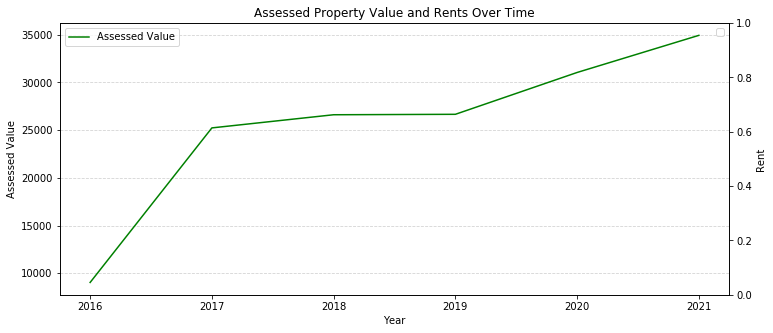

In [372]:
#60608
df_60608 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60608]

x_axis_data = df_60608.sort_values(by=['year'])["year"].unique()
y_axis_data = df_60608["board_tot"].groupby(df_60608["year"]).mean()
y_axis_sorted = y_axis_data.sort_values(ascending=True)


fig, ax = plt.subplots(figsize=(12,5), sharex=True)
ax2 = ax.twinx()
ax.set_title("Assessed Property Value and Rents Over Time")
ax.set_xlabel("Year")
ax.plot(x_axis_data, y_axis_sorted, color="green")
#ax2.plot(chimean_df["Unnamed: 0"], chimean_df["60608"], color="red")
ax.set_ylabel("Assessed Value")
ax2.set_ylabel("Rent")
ax.legend(["Assessed Value"])
ax2.legend(["Rent"])
#ax.set_xticks(df_60608["year"])
#ax2.set_xticklabels(df_60608["year"])
ax.yaxis.grid(color="lightgray", linestyle="dashed")
#plt.tight_layout()
plt.show()

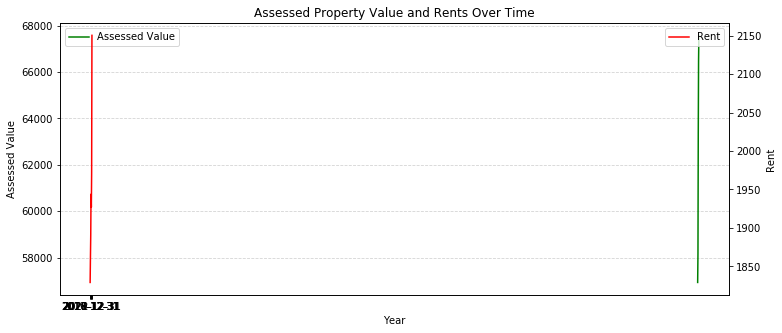

In [368]:
#60614
df_60614 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60614]

x_axis_data = df_60614.sort_values(by=['year'])["year"].unique()
y_axis_data = df_60614["board_tot"].groupby(df_60614["year"]).mean()
y_axis_sorted = y_axis_data.sort_values(ascending=True)


fig, ax = plt.subplots(figsize=(12,5), sharex=True)
ax2 = ax.twinx()
ax.set_title("Assessed Property Value and Rents Over Time")
ax.set_xlabel("Year")
ax.plot(x_axis_data, y_axis_sorted, color="green")
ax2.plot(chimean_df["Unnamed: 0"], chimean_df["60614"], color="red")
ax.set_ylabel("Assessed Value")
ax2.set_ylabel("Rent")
ax.legend(["Assessed Value"])
ax2.legend(["Rent"])
#ax.set_xticks(df_60608["year"])
#ax2.set_xticklabels(df_60614["year"])
ax.yaxis.grid(color="lightgray", linestyle="dashed")
#plt.tight_layout()
plt.show()

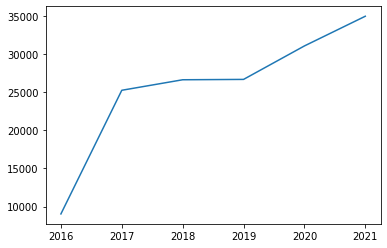

In [296]:
#60608

df_60608 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60608]
x_axis_data = df_60608.sort_values(by=['year'])["year"].unique()
y_axis_data = df_60608["board_tot"].groupby(df_60608["year"]).mean()
y_axis_sorted = y_axis_data.sort_values(ascending=True)
plt.plot(x_axis_data, y_axis_sorted)
plt.show()


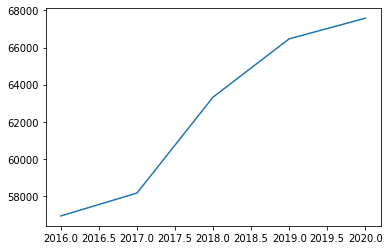

In [282]:
#60614

df_60614 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60614]
x_axis_data = df_60614.sort_values(by=['year'])["year"].unique()
y_axis_data = df_60614["board_tot"].groupby(df_60614["year"]).mean()
y_axis_sorted = y_axis_data.sort_values()
plt.plot(x_axis_data, y_axis_sorted)

plt.show()

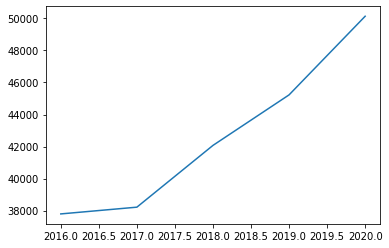

In [229]:
#60618

df_60618 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60618]
x_axis_data = df_60618.sort_values(by=['year'])["year"].unique()
y_axis_data = df_60618["board_tot"].groupby(df_60618["year"]).mean()
y_axis_sorted = y_axis_data.sort_values()
plt.plot(x_axis_data, y_axis_sorted)

plt.show()

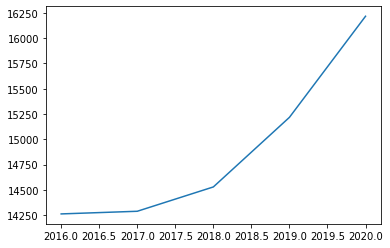

In [230]:
#60624

df_60624 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60624]
x_axis_data = df_60624.sort_values(by=['year'])["year"].unique()
y_axis_data = df_60624["board_tot"].groupby(df_60624["year"]).mean()
y_axis_sorted = y_axis_data.sort_values()
plt.plot(x_axis_data, y_axis_sorted)

plt.show()

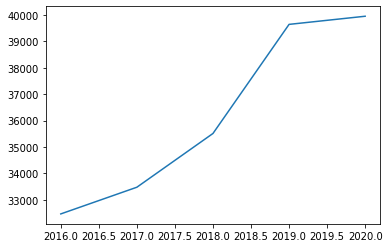

In [231]:
#60625

df_60625 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60625]
x_axis_data = df_60625.sort_values(by=['year'])["year"].unique()
y_axis_data = df_60625["board_tot"].groupby(df_60625["year"]).mean()
y_axis_sorted = y_axis_data.sort_values()
plt.plot(x_axis_data, y_axis_sorted)

plt.show()

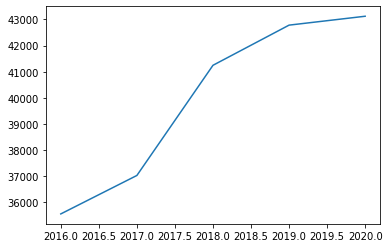

In [232]:
#60647

df_60647 = merged_df.loc[merged_df["prop_address_zipcode_1"] == 60647]
x_axis_data = df_60647.sort_values(by=['year'])["year"].unique()
y_axis_data = df_60647["board_tot"].groupby(df_60647["year"]).mean()
y_axis_sorted = y_axis_data.sort_values()
plt.plot(x_axis_data, y_axis_sorted)

plt.show()